#**Lab Activities 10-11 | Credit Card Fraud Detection**

2021059121 | Bayquen, Christopher Gilbert A.

*Estimated Time to Accomplish* : **~4 hours**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are `'Time'` and `'Amount'`. Feature `'Time'` contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature `'Class'` is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading the dataset
credit_df = pd.read_csv("/content/drive/MyDrive/MACHINE-LEARNING-DS/creditcard.csv")
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Check for missing values
credit_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

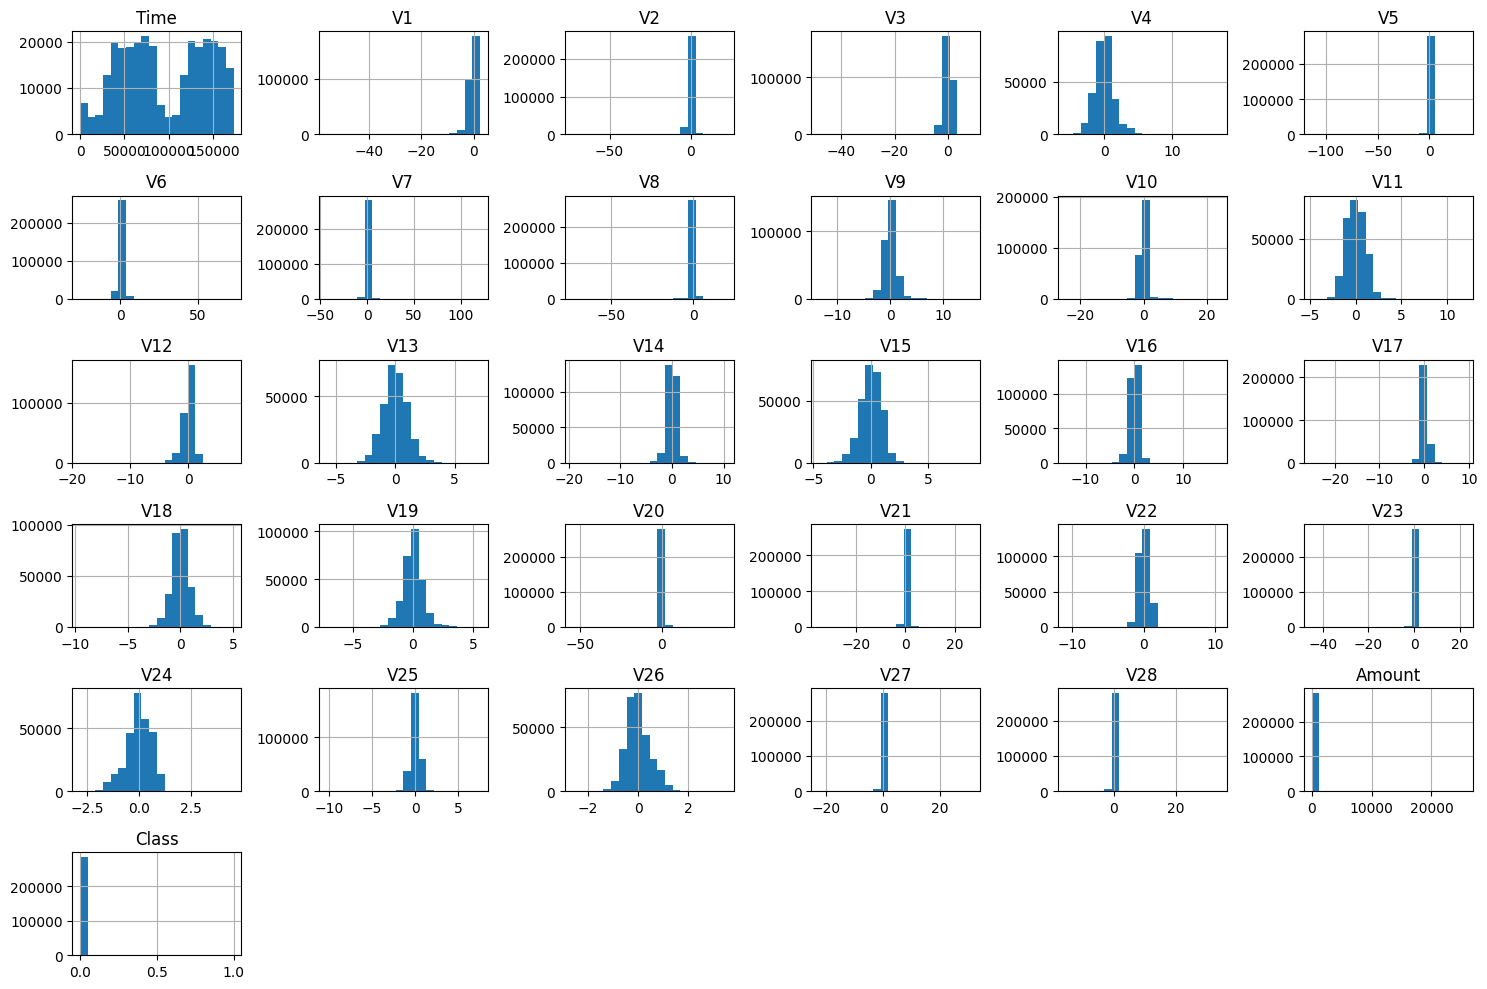

In [ ]:
#Checking for normality
credit_df.hist(bins = 20, figsize=(15, 10))
plt.tight_layout()
plt.show()

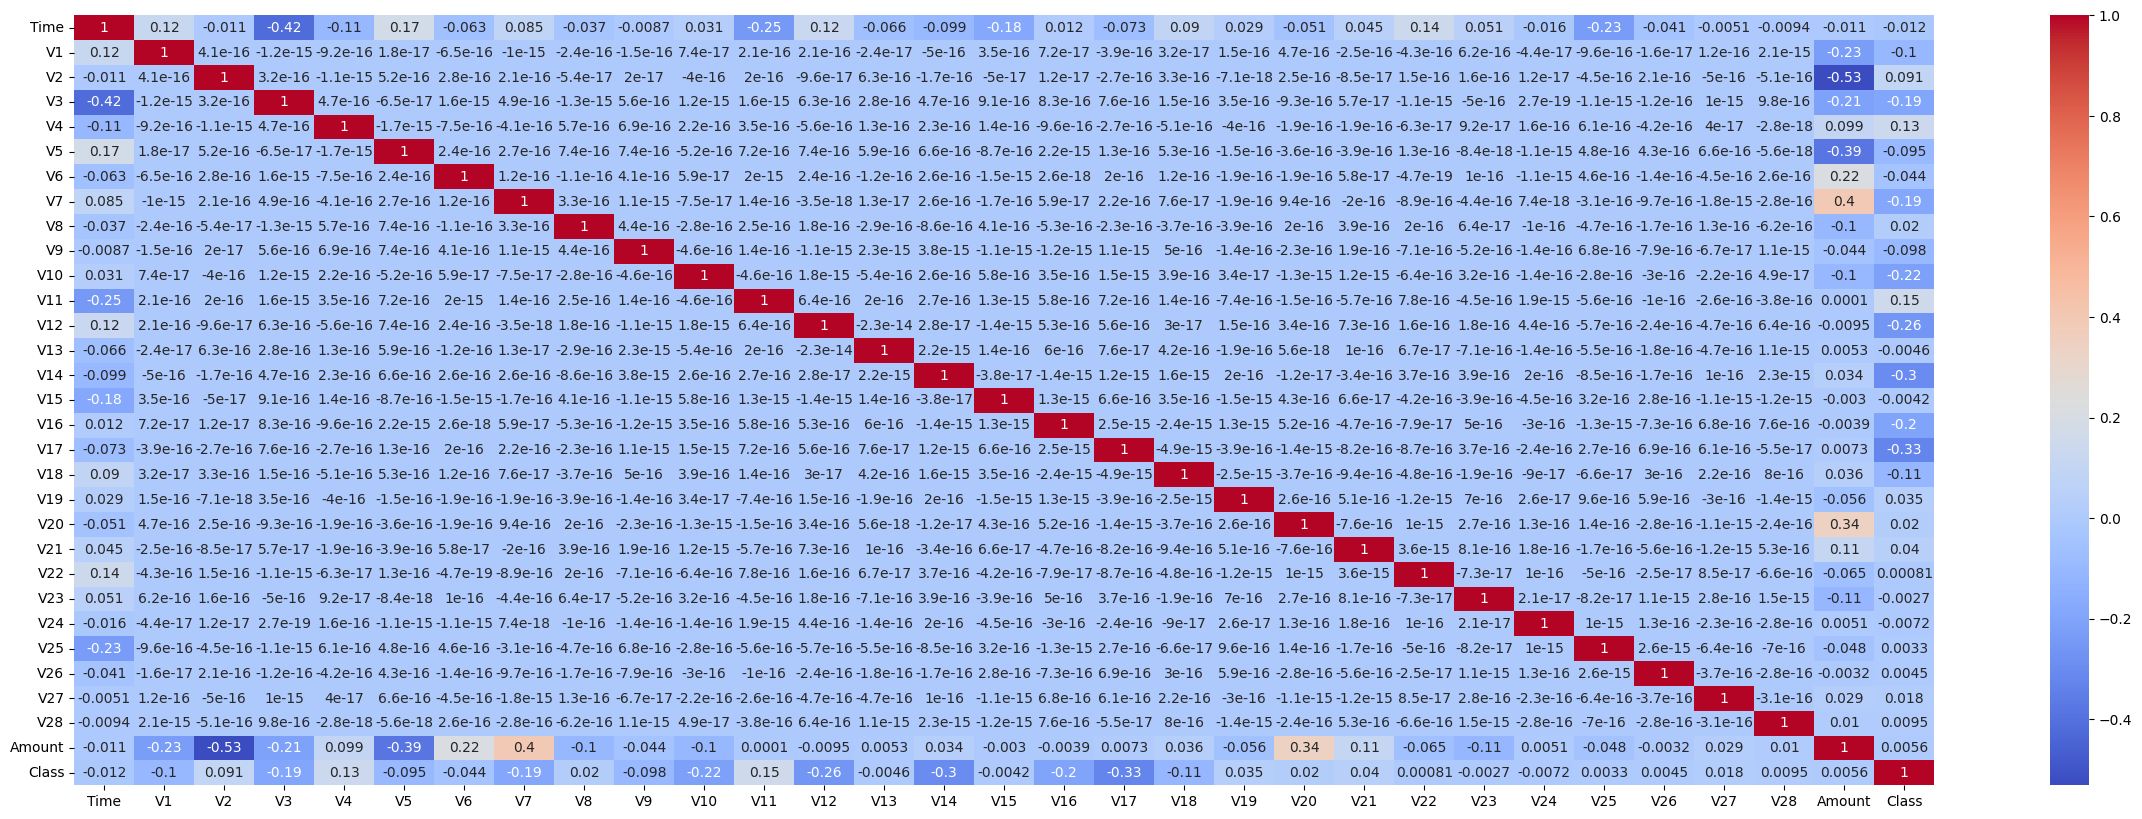

In [ ]:
#Checking for correlation
plt.figure(figsize=(30, 10))
sns.heatmap(credit_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Given the context of the dataset, it is expected that there is **no correlation** between the features `V1-V28`. Although, there are certain correlations between some of the features with Time and Amount.

,count
Class,
0,284315
1,492


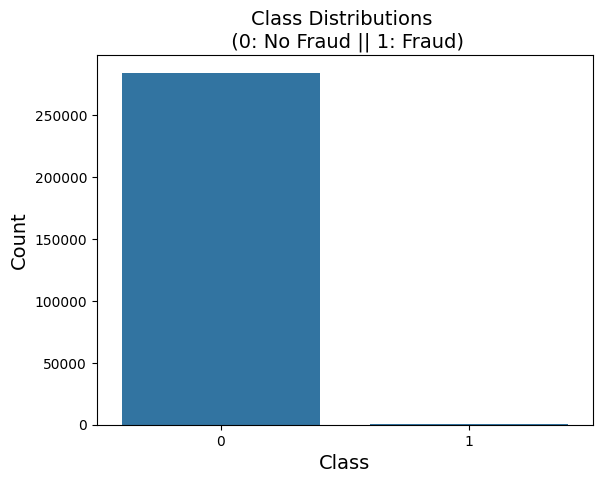

In [ ]:
#Checking for balance in data
sns.countplot(x = 'Class', data=credit_df)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

credit_df['Class'].value_counts()


As we can observe above, only **492** of all the transactions are **fraudulent**, which means the data is highly unbalanced with respect with target variable `Class`.

<Figure size 3000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

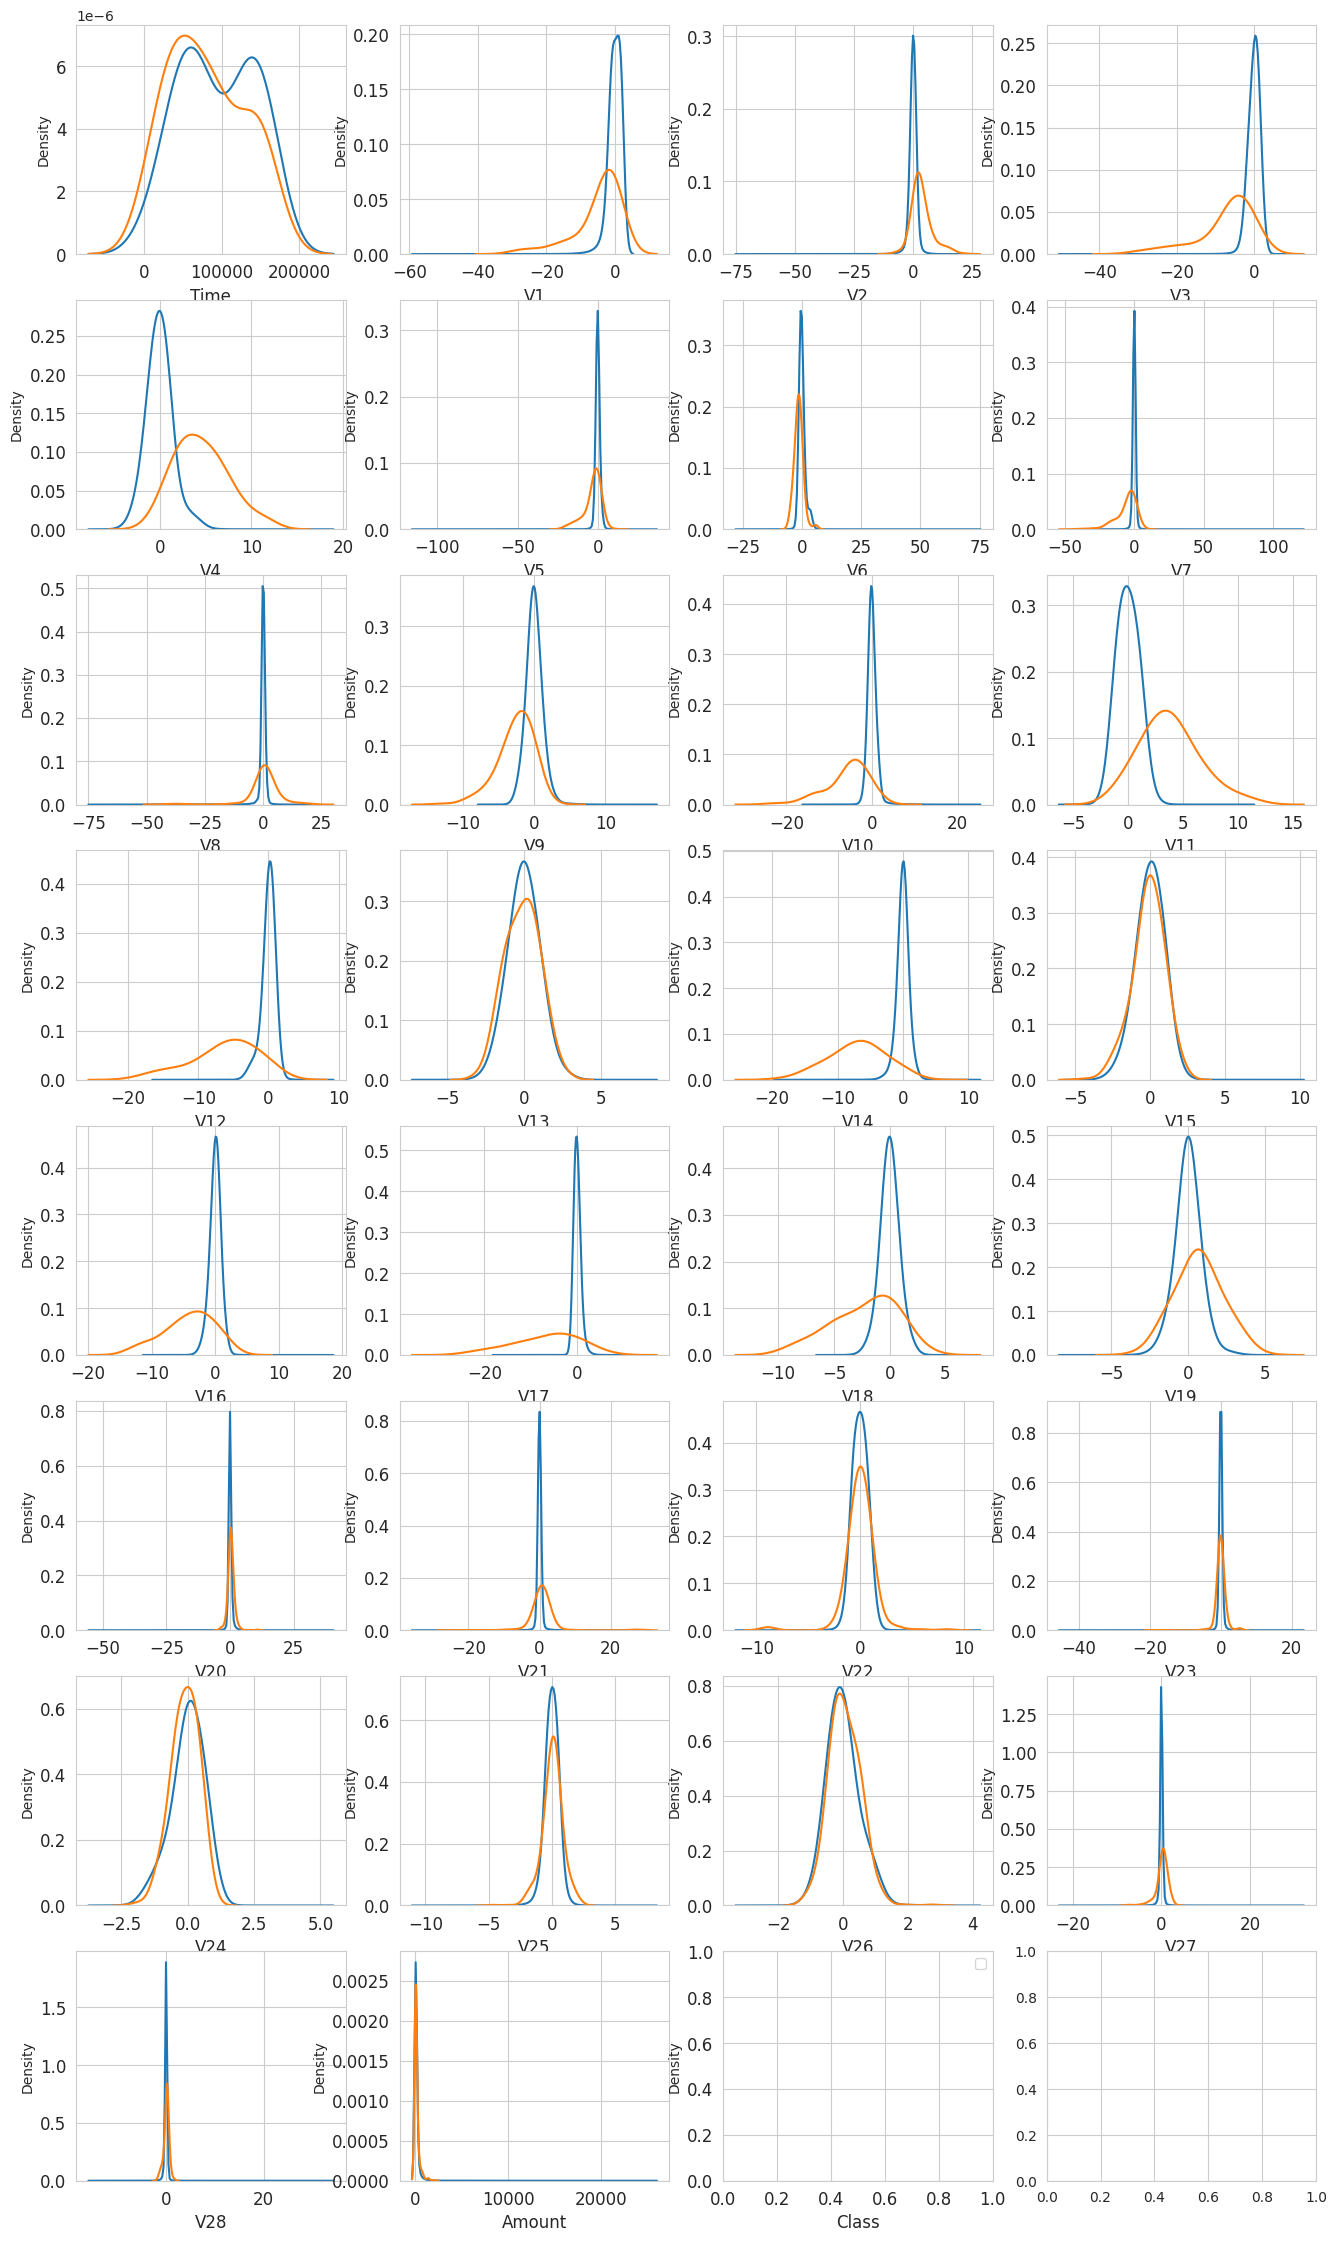

In [ ]:
#Checking the density of the features

plt.figure(figsize=(30, 10))
var = credit_df.columns.values

i = 0
t0 = credit_df.loc[credit_df['Class'] == 0]
t1 = credit_df.loc[credit_df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)


plt.legend()
plt.show();


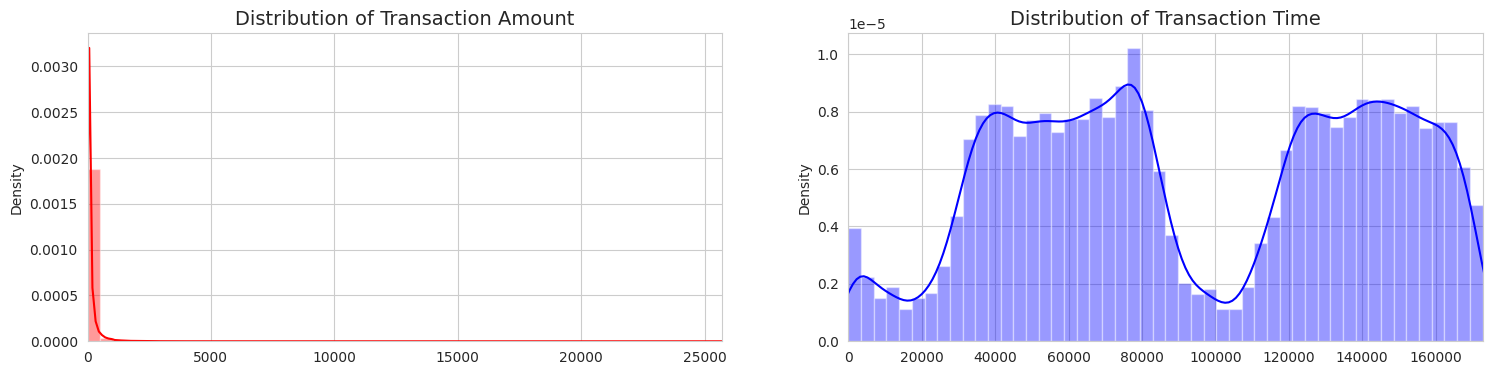

In [ ]:
#Density Distribution of Transactions

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = credit_df['Amount'].values
time_val = credit_df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

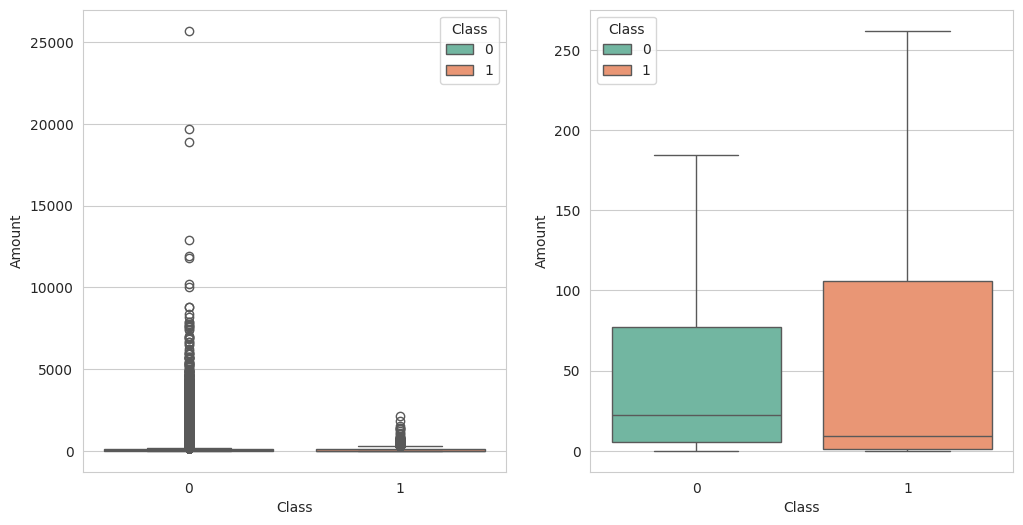

In [ ]:
#Checking transactions per class

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=credit_df, palette="Set2",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=credit_df, palette="Set2",showfliers=False)
plt.show();

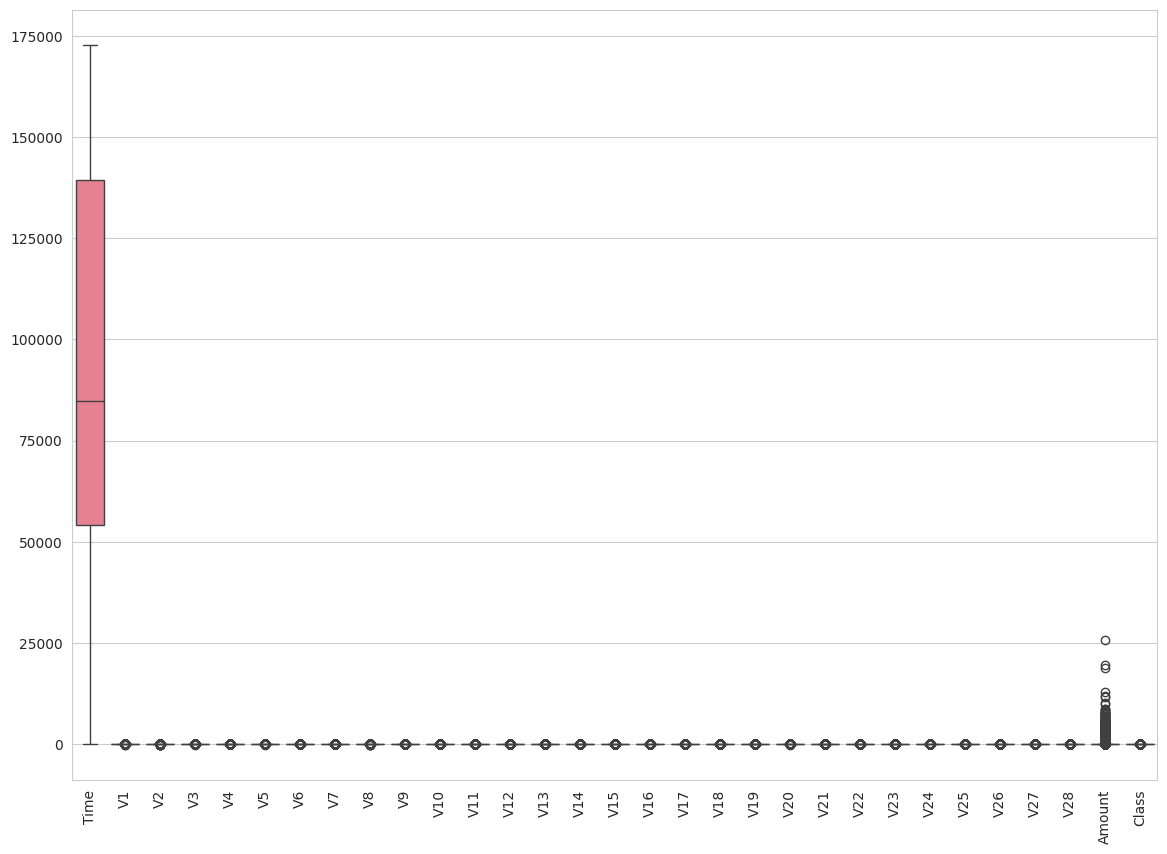

In [ ]:
#Visualizing Outliers

plt.figure(figsize=(14, 10))
sns.boxplot(data=credit_df)
plt.xticks(rotation=90)
plt.show()

**Handling the imbalance of the dataset**

In the previous plots above, we can notice how imbalance our original data is, having most of the transaction data be non-fraud. If we use this dataframe as is for our models, our models will be prone to a lot of errors and would most likely overfit due to the heavy skewness of the `class` of the transactions. We want our model to detect patterns that may give signs of transactions to be fraud.

We want to scale the features `Time` and `Amount`, and we want to create a sample of the dataframe to have an equal amount of fraud and non-fraud transactions to help our predictive models to better understand the patterns that determine whether a transction is a fraud or not.

 This sample of the dataframe will be a 50/50 ratio of the entire dataset. This will ensure that the models that we will be making will not be prone to overfitting since the sample that we will be training/testing will not be imbalanced, enabling the model to understand the patterns effectively.

 To achieve this, we will be using the Synthetic Minority Oversampling Technique (SMOTE) on the training split only. The model will be trained on the oversampled subset only to ensure the model learns patterns in the minority class, which will then be tested on the original, imbalanced dataset to evaluate its performance in a realistic scenario.

In [ ]:
#Scaling the Time and Amount features

scaler =  RobustScaler()

credit_df['Scaled_Amount'] = scaler.fit_transform(credit_df['Amount'].values.reshape(-1,1))
credit_df['Scaled_Time'] = scaler.fit_transform(credit_df['Time'].values.reshape(-1,1))

credit_df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
#rearranging the dataframe
cols = list(credit_df.columns)
cols = cols[-2:] + cols[:-2]
credit_df = credit_df[cols]

credit_df.head()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
credit_df.describe()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,...,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000,110679.000000
mean,0.151633,0.122046,0.848237,0.087567,0.072996,0.143292,-0.121229,-0.418368,0.039599,0.007273,...,-0.071710,-0.039776,-0.063928,0.011865,0.017223,0.062295,-0.014864,0.011999,0.004600,0.000108
std,0.570089,0.548124,1.100135,0.667596,1.171146,0.967903,0.704305,0.596375,0.621584,0.275378,...,0.160000,0.234806,0.658848,0.182500,0.500597,0.402509,0.407134,0.094517,0.061131,0.010412
min,-0.307413,-0.994983,-3.087106,-2.263366,-3.287967,-3.140191,-2.347490,-2.273488,-2.048536,-0.853702,...,-0.541940,-0.798491,-2.189110,-0.510208,-1.407232,-1.258382,-1.096414,-0.249762,-0.166945,0.000000
25%,-0.265633,-0.348682,-0.275254,-0.353166,-0.733980,-0.586176,-0.580769,-0.834717,-0.406096,-0.184061,...,-0.179123,-0.233155,-0.616354,-0.109720,-0.312548,-0.262208,-0.310842,-0.047570,-0.042054,0.000000
50%,-0.097953,-0.048215,1.175680,0.055604,0.230840,0.231446,-0.119360,-0.482460,0.071565,-0.019814,...,-0.085522,-0.051131,-0.082543,0.002996,0.041769,0.090578,0.002842,-0.003275,0.009365,0.000000
75%,0.361210,0.651958,1.912630,0.566907,0.940314,0.735956,0.354547,-0.040603,0.472292,0.169471,...,0.030574,0.139206,0.441639,0.128290,0.394307,0.373833,0.202492,0.051038,0.034926,0.000000
max,2.270663,1.034939,2.372905,2.717192,3.790995,3.021120,2.398704,1.697856,2.122622,0.873276,...,0.420417,0.725568,2.049508,0.498068,1.299212,1.292815,0.996562,0.270114,0.163818,1.000000


In [ ]:
#Dividing the original dataset
X = credit_df.drop('Class', axis=1)
y = credit_df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [ ]:
# StratifiedShuffleSplit for cross-validation
sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

**Model Implementation**

**1. Logistic Regression** *(20 sec training time)*



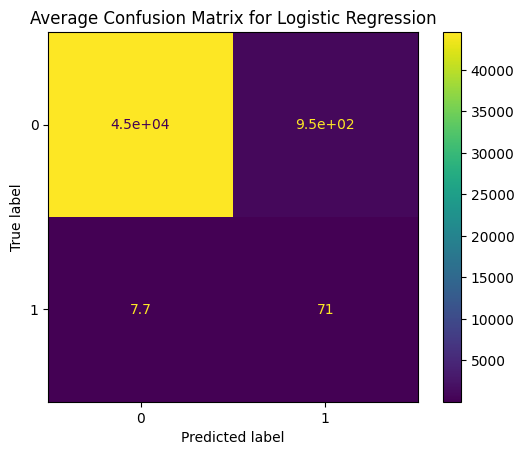

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.978999,0.070474,0.902954,0.130662


In [ ]:
# Implementing Logistic Regression
results_list = []
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []

confusion_matrices = []

log_reg = LogisticRegression()

# Implementing SMOTE Technique during Cross Validation
for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg)

    # Fit the model on the training split
    pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])

    # Make predictions on the test split
    prediction = pipeline.predict(original_Xtrain[test_index])

    # Calculate evaluation metrics
    accuracy_lst.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
    precision_lst.append(precision_score(original_ytrain[test_index], prediction))
    recall_lst.append(recall_score(original_ytrain[test_index], prediction))
    f1_lst.append(f1_score(original_ytrain[test_index], prediction))

    # Compute confusion matrix for each fold
    cm = confusion_matrix(original_ytrain[test_index], prediction)
    confusion_matrices.append(cm)


results_list.append({
    "Model" : "Logistic Regression",
    "Accuracy" : np.mean(accuracy_lst),
    "Precision" : np.mean(precision_lst),
    "Recall" : np.mean(recall_lst),
    "F1 Score" : np.mean(f1_lst)

})



results_df = pd.DataFrame(results_list)

# average of confusion matrices
avg_conf_matrix = np.mean(confusion_matrices, axis=0)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=log_reg.classes_)
disp.plot()
plt.title('Average Confusion Matrix for Logistic Regression')
plt.show()

# Return the results DataFrame
results_df


**2. K-Nearest Neighbors** *(30 mins training time)*


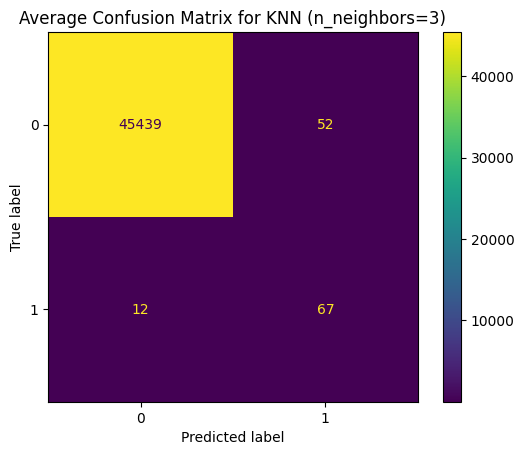

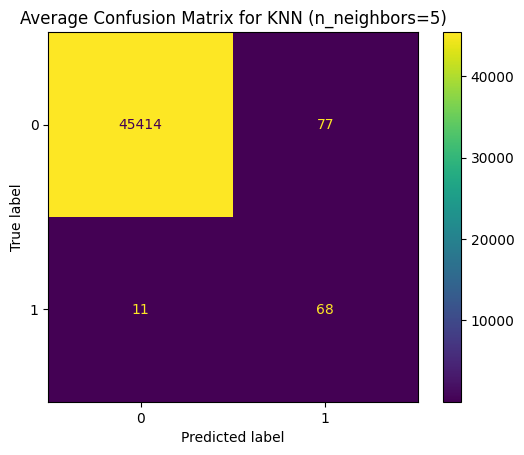

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.978999,0.070474,0.902954,0.130662
1,KNN with 3 neighbors,0.998588,0.561750,0.848101,0.675531
2,KNN with 5 neighbors,0.998069,0.469786,0.856540,0.606294


In [ ]:
#Implementing K-Nearest Neighbors
n_neighbors_list = [3, 5]

# Implementing SMOTE Technique during Cross Validation for each n_neighbors
for n_neighbors in n_neighbors_list:

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Initialize lists for each classifier's evaluation metrics
    accuracy_lst_temp = []
    precision_lst_temp = []
    recall_lst_temp = []
    f1_lst_temp = []
    confusion_matrices_temp = []
    classification_reports_temp = []

    for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), knn)

        # Fit the model
        pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
        prediction = pipeline.predict(original_Xtrain[test_index])

        # Calculate evaluation metrics
        accuracy_lst_temp.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
        precision_lst_temp.append(precision_score(original_ytrain[test_index], prediction))
        recall_lst_temp.append(recall_score(original_ytrain[test_index], prediction))
        f1_lst_temp.append(f1_score(original_ytrain[test_index], prediction))

        # Compute confusion matrix for each fold
        cm = confusion_matrix(original_ytrain[test_index], prediction)
        confusion_matrices_temp.append(cm)

    # Store the average results for each model
    results_list.append({
        "Model": f"KNN with {n_neighbors} neighbors",
        "Accuracy": np.mean(accuracy_lst_temp),
        "Precision": np.mean(precision_lst_temp),
        "Recall": np.mean(recall_lst_temp),
        "F1 Score": np.mean(f1_lst_temp)
    })

    # Average of confusion matrices
    avg_conf_matrix = np.round(np.mean(confusion_matrices_temp, axis=0)).astype(int)
    disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=np.unique(original_ytrain))
    disp.plot()
    plt.title(f'Average Confusion Matrix for KNN (n_neighbors={n_neighbors})')
    plt.show()

# Create a DataFrame from the results list after all iterations
results_df = pd.DataFrame(results_list)
results_df


**3. Decision Trees** *(2 mins training time)*

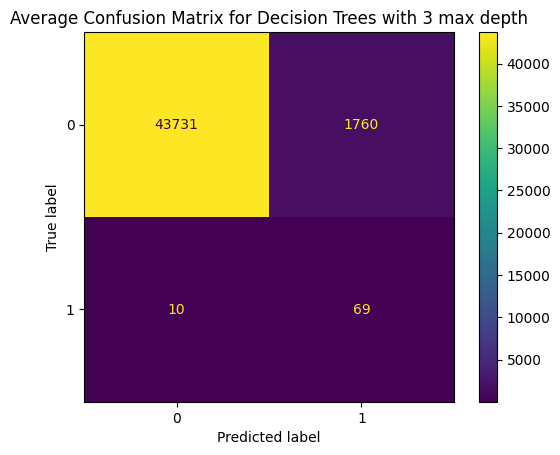

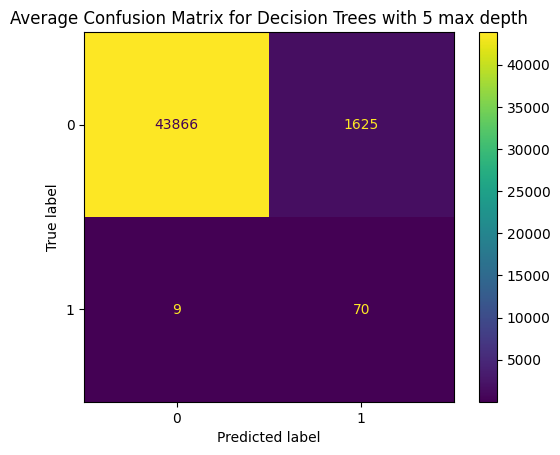

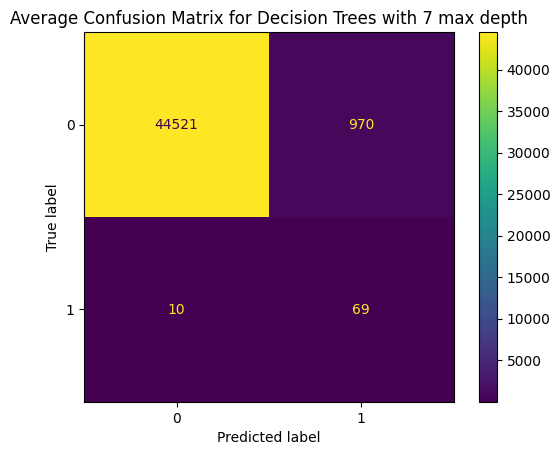

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.978999,0.070474,0.902954,0.130662
1,KNN with 3 neighbors,0.998588,0.561750,0.848101,0.675531
2,KNN with 5 neighbors,0.998069,0.469786,0.856540,0.606294
3,Decision Trees with 3 max depth,0.961151,0.037792,0.869198,0.072421
4,Decision Trees with 5 max depth,0.964143,0.041894,0.881857,0.079911
5,Decision Trees with 7 max depth,0.978487,0.067071,0.869198,0.124404


In [ ]:
#Implementing Decision Trees

max_depth_list = [3, 5, 7]

for max_depth in max_depth_list:

    dt = DecisionTreeClassifier(max_depth=max_depth)
    accuracy_lst_temp = []
    precision_lst_temp = []
    recall_lst_temp = []
    f1_lst_temp = []
    confusion_matrices_temp = []

    for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), dt)

        # Fit the model
        pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
        prediction = pipeline.predict(original_Xtrain[test_index])

        # Calculating evaluation metrics
        accuracy_lst_temp.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
        precision_lst_temp.append(precision_score(original_ytrain[test_index], prediction))
        recall_lst_temp.append(recall_score(original_ytrain[test_index], prediction))
        f1_lst_temp.append(f1_score(original_ytrain[test_index], prediction))

        # Compute confusion matrix for each fold
        cm = confusion_matrix(original_ytrain[test_index], prediction)
        confusion_matrices_temp.append(cm)

    # Store the average results for each model
    results_list.append({
        "Model": f"Decision Trees with {max_depth} max depth",
        "Accuracy": np.mean(accuracy_lst_temp),
        "Precision": np.mean(precision_lst_temp),
        "Recall": np.mean(recall_lst_temp),
        "F1 Score": np.mean(f1_lst_temp)
    })

    # Average of confusion matrices
    avg_conf_matrix = np.round(np.mean(confusion_matrices_temp, axis=0)).astype(int)
    disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=dt.classes_)
    disp.plot()
    plt.title(f'Average Confusion Matrix for Decision Trees with {max_depth} max depth')
    plt.show()

# Create a DataFrame from the results list after all iterations
results_df = pd.DataFrame(results_list)
results_df



**4. Linear Discriminant Analysis** *(8 sec training time)*

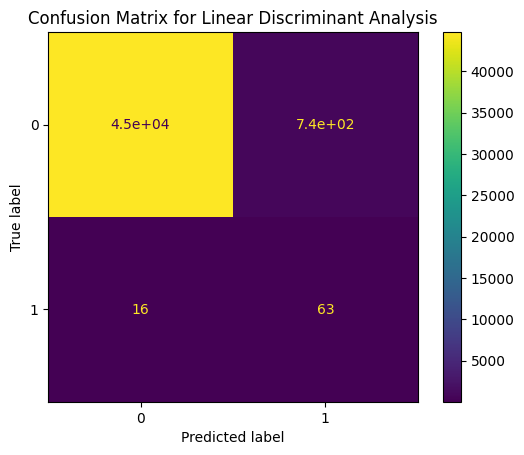

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.978999,0.070474,0.902954,0.130662
1,KNN with 3 neighbors,0.998588,0.561750,0.848101,0.675531
2,KNN with 5 neighbors,0.998069,0.469786,0.856540,0.606294
3,Decision Trees with 3 max depth,0.961151,0.037792,0.869198,0.072421
4,Decision Trees with 5 max depth,0.964143,0.041894,0.881857,0.079911
5,Decision Trees with 7 max depth,0.978487,0.067071,0.869198,0.124404
6,Linear Discriminant Analysis,0.983359,0.078499,0.801688,0.142974


In [ ]:
#Implementing Discriminant Analysis

accuracy_lst_temp = []
precision_lst_temp = []
recall_lst_temp = []
f1_lst_temp = []
confusion_matrices_temp = []

lda = LinearDiscriminantAnalysis()

for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), lda)
    pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
    prediction = pipeline.predict(original_Xtrain[test_index])

    #Calculating evaluation metrics
    accuracy_lst_temp.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
    precision_lst_temp.append(precision_score(original_ytrain[test_index], prediction))
    recall_lst_temp.append(recall_score(original_ytrain[test_index], prediction))
    f1_lst_temp.append(f1_score(original_ytrain[test_index], prediction))

    #Confusion Matrix
    cm = confusion_matrix(original_ytrain[test_index], prediction)
    confusion_matrices_temp.append(cm)

results_list.append({
    "Model": "Linear Discriminant Analysis",
    "Accuracy": np.mean(accuracy_lst_temp),
    "Precision": np.mean(precision_lst_temp),
    "Recall": np.mean(recall_lst_temp),
    "F1 Score": np.mean(f1_lst_temp)
})

# average of confusion matrices
avg_conf_matrix = np.mean(confusion_matrices_temp, axis=0)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=lda.classes_)
disp.plot()
plt.title('Confusion Matrix for Linear Discriminant Analysis')
plt.show()

# Return the results DataFrame
results_df = pd.DataFrame(results_list)
results_df


**5. Naive Bayes** *(2 sec training time)*

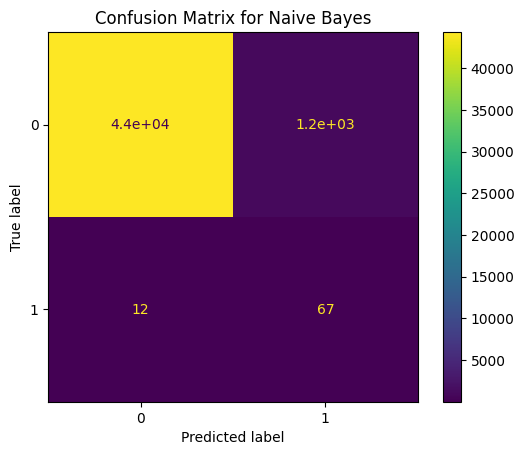

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.978999,0.070474,0.902954,0.130662
1,KNN with 3 neighbors,0.998588,0.561750,0.848101,0.675531
2,KNN with 5 neighbors,0.998069,0.469786,0.856540,0.606294
3,Decision Trees with 3 max depth,0.961151,0.037792,0.869198,0.072421
4,Decision Trees with 5 max depth,0.964143,0.041894,0.881857,0.079911
5,Decision Trees with 7 max depth,0.978487,0.067071,0.869198,0.124404
6,Linear Discriminant Analysis,0.983359,0.078499,0.801688,0.142974
7,Naive Bayes,0.974289,0.054676,0.848101,0.102717


In [ ]:
#Implementing Naive Bayes

accuracy_lst_temp = []
precision_lst_temp = []
recall_lst_temp = []
f1_lst_temp = []
confusion_matrices_temp = []

nb = GaussianNB()

for train_index, test_index in sss.split(original_Xtrain, original_ytrain):

    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), nb)
    pipeline.fit(original_Xtrain[train_index], original_ytrain[train_index])
    prediction = pipeline.predict(original_Xtrain[test_index])

    #Calculating evaluation metrics

    accuracy_lst_temp.append(pipeline.score(original_Xtrain[test_index], original_ytrain[test_index]))
    precision_lst_temp.append(precision_score(original_ytrain[test_index], prediction))
    recall_lst_temp.append(recall_score(original_ytrain[test_index], prediction))
    f1_lst_temp.append(f1_score(original_ytrain[test_index], prediction))

    #Confusion Matrix
    cm = confusion_matrix(original_ytrain[test_index], prediction)
    confusion_matrices_temp.append(cm)

results_list.append({
    "Model": "Naive Bayes",
    "Accuracy": np.mean(accuracy_lst_temp),
    "Precision": np.mean(precision_lst_temp),
    "Recall": np.mean(recall_lst_temp),
    "F1 Score": np.mean(f1_lst_temp)
})

# average of confusion matrices
avg_conf_matrix = np.mean(confusion_matrices_temp, axis=0)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=avg_conf_matrix, display_labels=nb.classes_)
disp.plot()
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Return the results DataFrame
results_df = pd.DataFrame(results_list)
results_df


**FOR MODELS 6 to 9**

The training and testing of models 6 to 9 is implemented at a different notebook: https://colab.research.google.com/drive/13BLgdOyxWh9_2lEpiPSD7omdMjTQl4MR?usp=sharing. The model evaluations and analysis will also be continued in the notebook provided above.

This is because, while training the SVM model, I did not oversee the fact that we are training on a large datase (100,000 rows); after 2 hours of training and no sign of finishing, I decided to interrupt the session and try a different approach. Since the some of the previous models took around 30 mins to train, I decided to just train the new models on a different notebook to save run time.